<a href="https://colab.research.google.com/github/abhishekshah5486/classic-machine-learning/blob/main/ridge_regression_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

Text(0, 0.5, 'y')

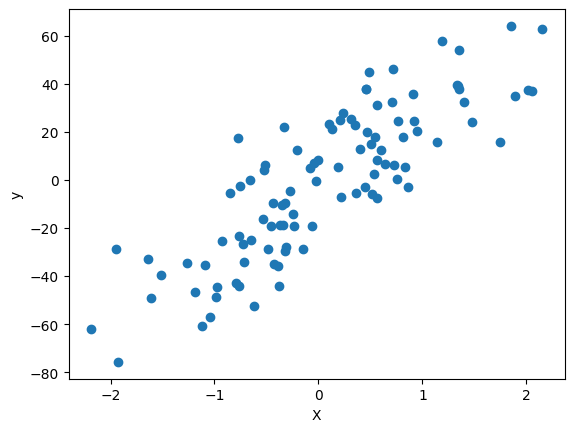

In [4]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
print(lr.coef_)
print(lr.intercept_)
print('rmse: ', np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))

[28.12597332]
-2.2710144261783825
rmse:  17.35878361048988


In [13]:
from sklearn.linear_model import Ridge

In [18]:
rr = Ridge(alpha = 10)
rr.fit(X_train, y_train)
print(rr.coef_)
print(rr.intercept_)
print('rmse: ', np.sqrt(mean_squared_error(y_train, rr.predict(X_train))))

[24.84312743]
-2.1047489001173156
rmse:  17.649982670425665


### Custom Ridge Regression Method
### Code from Scratch

In [27]:
class RidgeRegression():
  def __init__(self, alpha=0.1):
    self.alpha = alpha
    self.dW = None
    self.db = None

In [28]:
def fit(self, X, y):
  num = 0
  den = 0
  n = X.shape[0]
  self.coef_ = None
  self.intercept_ = None
  for i in range(X.shape[0]):
    num += (y[i] - y.mean()) * (X[i] - X.mean())
    den += np.square((X[i] - X.mean()))
  self.coef_ = num / (den + self.alpha)
  self.intercept_ = (y.mean() - self.coef_*X.mean())
  self.dW = self.coef_
  self.db = self.intercept_

RidgeRegression.fit = fit

In [29]:
def predict(self, X):
  return (self.dW * X) + self.db

RidgeRegression.predict = predict

In [30]:
ridge = RidgeRegression(alpha = 10)

In [31]:
ridge.fit(X_train, y_train)

In [32]:
print(ridge.coef_)
print(ridge.intercept_)
print('rmse: ', np.sqrt(mean_squared_error(y_train, ridge.predict(X_train))))

[24.84312743]
[-2.1047489]
rmse:  17.649982670425665


### Multiple Ridge Regression From Scratch

In [33]:
from sklearn.datasets import load_diabetes

In [34]:
X, y = load_diabetes(return_X_y=True)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [36]:
from sklearn.linear_model import Ridge

In [38]:
rr = Ridge(alpha = 0.1, solver='cholesky')

In [39]:
rr.fit(X_train,  y_train)

Ridge(alpha=0.1, solver='cholesky')

In [40]:
print(rr.coef_)
print(rr.intercept_)

[   6.64373321 -172.23747375  485.52958514  314.67584612  -72.94020918
  -80.58868817 -174.46352722   83.61470987  484.36531622   73.58509056]
151.92546856900984


### Custom Multiple Ridge Regression Code from Scratch

In [41]:
class RidgeRegression():
  def __init__(self, alpha=0.1):
    self.alpha = alpha
    self.dW = None
    self.db = None

In [47]:
def fit(self, X, y):
  self.coef_ = None
  self.intercept_ = None
  X = np.insert(X, 0, 1, axis=1)
  I = np.identity(X.shape[1])
  result = np.linalg.inv(np.dot(X.T, X) + self.alpha*I).dot(X.T).dot(y)
  self.dW = result[1:,]
  self.coef_ = self.dW
  self.db = result[0]
  self.intercept_ = self.db

RidgeRegression.fit = fit

In [48]:
def predict(self, X):
  return np.dot(X, self.dW) + self.db

RidgeRegression.predict = predict

In [49]:
lr = RidgeRegression()

In [50]:
lr.fit(X_train, y_train)

In [51]:
print(lr.coef_)
print(lr.intercept_)

[   6.64970105 -172.2493574   485.49941498  314.68335483  -72.93919534
  -80.6014393  -174.45279965   83.5733994   484.39865564   73.58483208]
151.88221592211522
